This notebook will let us examine alpha diversity for a category in depth. We're already summarized the alpha diveristy p values for all categories in a [previous notebook](). Here, we can do post-hoc testing and look at the alpha diversity values associated with a single category.

Let's start by importing the modules and functions we'll need to the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats
import skbio

import americangut.diversity_analysis as div

from americangut.ag_data import AgData
from americangut.ag_data_dictionary import ag_data_dictionary

/Users/jwdebelius/anaconda/envs/americangut/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from matplotlib import rcParams

% matplotlib inline

# Formats the axes using seabron so they will be white, and have ticks
# on the bottom of the axes.
sn.set_style('ticks', {'axes.facecolor': 'none'})

# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

Next, let's select the data set and rarefaction depth we wish to use.

In [3]:
bodysite = 'fecal'
sequence_trim = '100nt'
rarefaction_depth = '10k'

use_subset = True
use_one_sample = True

In [4]:
fecal_data = AgData(bodysite=bodysite, 
                    trim=sequence_trim, 
                    depth=rarefaction_depth, 
                    sub_participants=use_subset, 
                    one_sample=use_one_sample)

Finally, we can pick the alpha diversity metric, the category to interogate, and set and order, if one is relevant.

In [37]:
metric = 'PD_whole_tree'

group_name = 'WEIGHT_CHANGE'

Now, let's read the files assoicated with the data and load the data dictionary entry for the group.

In [38]:
group = ag_data_dictionary[group_name]

We're going to start by cleaning up the data. So, let's remove any samples that might be outliers (in rounds 1-21, there is a sample with alpha diveristy seven standard deivations above the mean and 4 standard deviations about the next highest sample).

We'll also clean up the mapping column as needed, to make analsyis easier.

In [39]:

fecal_data.drop_alpha_outliers()
fecal_data.clean_up_column(group)

Now that we have the data loaded, let's plot it.

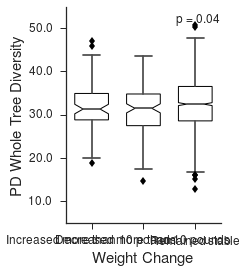

In [43]:
ax = div.pretty_pandas_boxplot(meta=fecal_data.map_,
                               group=group.name,
                               metric='%s_%s' % (metric, rarefaction_depth),
                               order=group.order,
                               bw=True,
                               ylim=[5, 55],
                               xlabel=group.clean_name,
                               xticklabels=group.order,
                               ylabel='PD Whole Tree Diversity',
                               show_p=True,
                               )
ax.set_position((0.2, 0.2, 0.12*len(group.order), 0.75))
fig = ax.figure
fig.savefig('/Users/jwdebelius/Desktop/ag_images/alpha/images/%s_subset.pdf' % group.name)

We can also examine significant differences using a post-hoc test to see what drives these differences.

In [44]:
post_hoc = div.post_hoc_pandas(meta=fecal_data.map_,
                    group=group.name,
                    cat='%s_%s'% (metric, rarefaction_depth),
                    order=group.order,
                    correct='bonferroni',
                   )
post_hoc.to_csv('/Users/jwdebelius/Desktop/ag_images/alpha/summary/%s_subset.txt' % group.name,
                sep='\t')
post_hoc

,Counts,Mean,Median,Stdv,Increased more than 10 pounds,Decreased more than 10 pounds
WEIGHT_CHANGE,,,,,,
Increased more than 10 pounds,76,31.715805,31.292436,5.434040,NaN,NaN
Decreased more than 10 pounds,120,31.046119,31.455573,5.615780,1.000000,NaN
Remained stable,1381,32.515601,32.431556,5.858638,0.719965,0.053744
